In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder='/content/drive/MyDrive/Colab Notebooks/B5/'

In [ ]:
photos,labels = list(),list()

In [ ]:
for file in listdir(folder):
  output=0.0
  if file.startswith('HoaDK'):
    output=1.0
  if file.startswith('HoaKDK'):
    output=2.0
  if file.startswith('Hung'):
    output=3.0

  photo = load_img(folder+file,target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/Colab Notebooks/photo_B5.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/label_B5.npy',labels)

In [ ]:
print(photos.shape)
print(labels.shape)

(461, 200, 200, 3)
(461,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(322, 200, 200, 3)
(139, 200, 200, 3)


In [ ]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical #One_hot_key
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [ ]:
print(train_x.shape)
print(y_train.shape)

(322, 200, 200, 3)
(322, 4)


In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [ ]:
batch_size = 100
epochs = 10
classes = 4 #4 đầu ra thì lớp là 5 để biển diễn được lớp thứ 0

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))

In [ ]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
train = model.fit(train_x,y_train,batch_size=50,epochs=500,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/500
7/7 [==============================] - 3s 206ms/step - loss: 11.2671 - accuracy: 0.4441
Epoch 2/500
7/7 [==============================] - 1s 87ms/step - loss: 0.9032 - accuracy: 0.7671
Epoch 3/500
7/7 [==============================] - 1s 87ms/step - loss: 0.3041 - accuracy: 0.8789
Epoch 4/500
7/7 [==============================] - 1s 81ms/step - loss: 0.0720 - accuracy: 0.9752
Epoch 5/500
7/7 [==============================] - 1s 82ms/step - loss: 0.0299 - accuracy: 0.9845
Epoch 6/500
7/7 [==============================] - 1s 82ms/step - loss: 0.0082 - accuracy: 0.9969
Epoch 7/500
7/7 [==============================] - 1s 81ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 8/500
7/7 [==============================] - 1s 82ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/500
7/7 [==============================] - 1s 82ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/500
7/7 [==============================] - 1s 81ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 11/500
7/7 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/B5.h5')

1/1 [==============================] - 0s 110ms/step
[1]
Hòa đeo kính


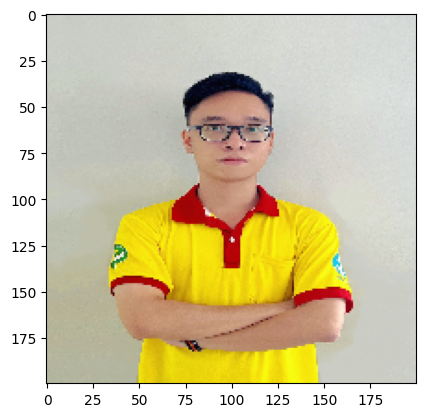

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Colab Notebooks/Test5_1.jpg',target_size=(200,200,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Hòa đeo kính")
if (a == 2):
  print("Hòa không đeo kính")
if (a == 3):
  print("Thảo Hưng")


1/1 [==============================] - 0s 29ms/step
[3]
Thảo Hưng


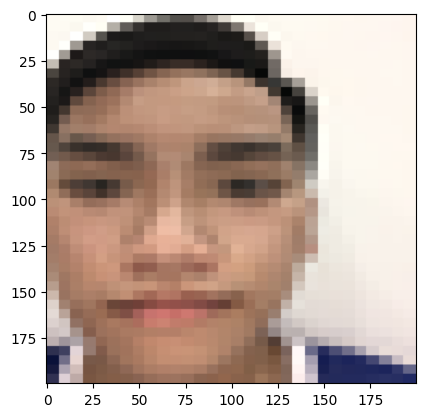

In [ ]:
img1 = load_img('/content/drive/MyDrive/Colab Notebooks/Test5_2.png',target_size=(200,200,3))
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = img1.reshape(1,200,200,3)
img1 = img1.astype('float32')
img1 = img1/255
a = np.argmax(model.predict(img1),axis=-1)
print(a)
if(a == 1):
  print("Hòa đeo kính")
if (a == 2):
  print("Hòa không đeo kính")
if (a == 3):
  print("Thảo Hưng")

1/1 [==============================] - 0s 18ms/step
[3]
Thảo Hưng


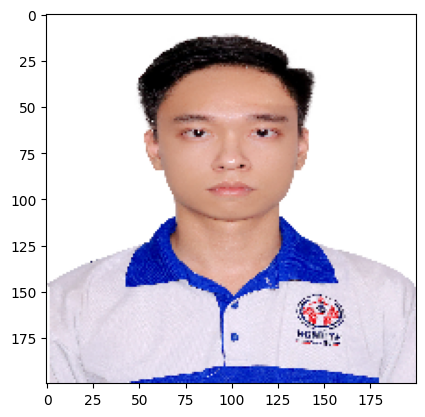

In [ ]:
img2 = load_img('/content/drive/MyDrive/Colab Notebooks/Test5_3.jpg',target_size=(200,200,3))
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = img2.reshape(1,200,200,3)
img2 = img2.astype('float32')
img2 = img2/255
a = np.argmax(model.predict(img2),axis=-1)
print(a)
if(a == 1):
  print("Hòa đeo kính")
if (a == 2):
  print("Hòa không đeo kính")
if (a == 3):
  print("Thảo Hưng")